In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LDA(X0, X1):
    mean0 = np.mean(X0, axis=0)#均值向量
    mean1 = np.mean(X1, axis=0)
    Sw = (X0-mean0).T.dot(X0-mean0) + (X1-mean1).T.dot(X1-mean1)#类内散度矩阵
    omega = np.linalg.inv(Sw).dot((mean0-mean1).T)#分类直线
    return omega


In [3]:
#data
data = pd.DataFrame([[0.697,0.460,1],
        [0.774,0.376,1],
        [0.634,0.264,1],
        [0.608,0.318,1],
        [0.556,0.215,1],
        [0.403,0.237,1],
        [0.481,0.149,1],
        [0.437,0.211,1],
        [0.666,0.091,0],
        [0.243,0.267,0],
        [0.245,0.057,0],
        [0.343,0.099,0],
        [0.639,0.161,0],
        [0.657,0.198,0],
        [0.360,0.370,0],
        [0.593,0.042,0],
        [0.719,0.103,0]],columns=['密度','含糖量','好瓜'])

In [4]:
data

,密度,含糖量,好瓜
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1
5,0.403,0.237,1
6,0.481,0.149,1
7,0.437,0.211,1
8,0.666,0.091,0
9,0.243,0.267,0


In [5]:
positive_data = data.values[data.values[:, -1] == 1, :]
negative_data = data.values[data.values[:, -1] == 0, :]
print (positive_data)

[[0.697 0.46  1.   ]
 [0.774 0.376 1.   ]
 [0.634 0.264 1.   ]
 [0.608 0.318 1.   ]
 [0.556 0.215 1.   ]
 [0.403 0.237 1.   ]
 [0.481 0.149 1.   ]
 [0.437 0.211 1.   ]]


In [6]:
#LDA
omega = LDA(negative_data[:, 0:-1], positive_data[:, 0:-1])

In [7]:
omega

array([-0.14650982, -0.73871557])

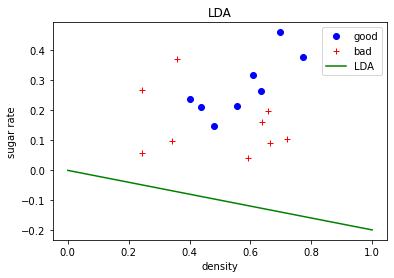

In [8]:
#plot
plt.plot(positive_data[:, 0], positive_data[:, 1], "bo",label="good")
plt.plot(negative_data[:, 0], negative_data[:, 1], "r+",label="bad")

plt.plot([0, 1], [0, -omega[0]/omega[1]], 'g-',label='LDA')

plt.xlabel('density')
plt.ylabel('sugar rate')
plt.title("LDA")
plt.legend()
plt.show()